# Neural networks (NN)

` Neural networks are a set of algorithms, loosely modeled after the human brain, that are designed to recognize patterns. They interpret sensory data through machine perception, labeling or clustering raw input. The recoginized patterns are coefficients, contained in vectors, which all real-world data, be it images, sound, text or time series, must be translated into .`

## Introduction
In this lab, we build a function called 'Mickey', which is composed of 3 circles. We set the values inside and outside the 'Mickey function' as 1 and 0 respectively. By feeding the neural network with the training data, we expect the neural network could 'learn' the boundary of the 'Mickey function'. To get a sense of how nerual networks are trained, you can practise on the Tensorflow playground [[Click Me]](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.11443&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).



In [1]:
#import modulus
import numpy as np
import matplotlib.pyplot as plt
import random
# machine learning related
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## The Mickey Function

The Mickey function is composed of 3 circles. The big circle with radius1 is the head of Mickey. Two smaller circle with radius2 are the ears. In the real world, data always comes with noises. We add random gaussian 'errors' perturbing the radius of head and ears with equal magnitude. If you dont want any noise, we can set the variable error as 0.

In [2]:
# ground truth function
def mickey(x,y,error,radius1,radius2):
    r=0.9*radius1
    if random.choice([0,1])==0:
        radius1+=error
    else:
        radius2+=error
    if  (x**2+y**2<radius1**2) or \
        (x-r)**2+(y-r)**2<radius2**2 or \
        (x+r)**2+(y-r)**2<radius2**2:
        return 1 
    else:
        return 0

## Creating Training Dataset

We now create the dataset by setting the dataset size, boundary of the total picture, radius of mickey's head and ear, mean and standard deviation of the error term. We then split the dataset into training and testing portions. The training portion is used to train the neural network by updating weights and bias in each neuron. The testing portion is then used to measure the performance of the model.

![image](Fig/training_mickey.png)

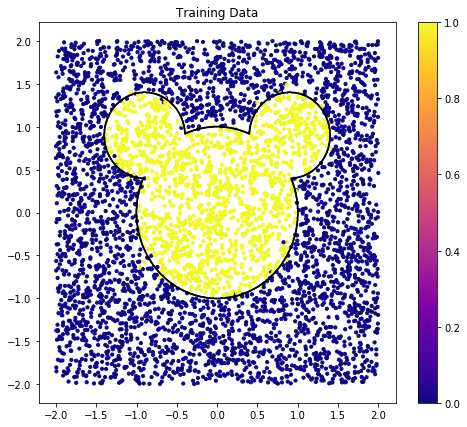

In [3]:
# create the dataset
# size of the dataset
dataset_size=5000
# boundary of the total picture
board=2
# radius of mickey's head
radius1=1
# radius of mickey's ear
radius2=0.5
# error term 
# mu is the mean of the normal distribution
# sigma is the standard deviation of the normal distribution
mu, sigma = 0, 0.05

# initialize dataset
X_train=np.zeros((dataset_size,2))
y_train=np.zeros(dataset_size)

# Boundary
curve_size=1000
BoundX=np.linspace(-board,board,curve_size)
BoundY=np.linspace(-board,board,curve_size)
BoundZ=np.zeros((curve_size,curve_size))
for i in range(curve_size):
    for j in range(curve_size):
         BoundZ[j,i]=mickey(BoundX[i],BoundY[j],0,radius1,radius2)

# generate random data points with error in normal distribution
for i in range(dataset_size):
    X_train[i,0]=random.uniform(-board,board)
    X_train[i,1]=random.uniform(-board,board)
    error = np.random.normal(mu, sigma, 1)
    y_train[i]=mickey(X_train[i,0],X_train[i,1],error,radius1,radius2)


# plot the figure of training dataset
plt.figure(figsize=(8,7))
plt.title("Training Data")
plt.contour(BoundX, BoundY, BoundZ, 1, colors='k') 
sc=plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=10,cmap='plasma')
plt.colorbar(sc)


## Building and Training a Model

The key component to construct a nerual net work is the function [dense layer](https://keras.io/api/layers/core_layers/dense/). 'Dense' is part of the Keras API written in Python, running on top of the machine learning platform TensorFlow. This function adds multiple dense layers of neurons to the neural network. First, you need to set the parameter called units. It represents the dimensionality of the output space and it must be a positive integer. You also need to set the activation function. The first layer is very special, you need to define the input dimensionality (input_dim). In our case the input_dim equals 2. 

To train a nerual network with good performance, you need to set some hyperparameters and metrics. 

(1) Loss Function: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training (Binary Crossentropy, Hinge Loss, Mean Square Error, etc) [More Choices](https://keras.io/api/losses/).

(2) Optimizer: Optimizers update the weight parameters to minimize the loss function (Adagrad, Adadelta, Momentum, RMSProp, etc) [More Choices](https://keras.io/api/optimizers/).

(3) Activation Functions: `Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.` (relu, sigmoid, softmax ,etc) [More Choices](https://keras.io/api/layers/activations/).

Notice: In practise, relu are usually adopted in the middle layers. The activiation function of the last layer are usually selected depending on the problem. We often use the sigmoid function for binary classification and the softmax function for multiple classification problems.

(4) Epoch: `One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE`

(5) Batch Size: `Total number of training examples used in a single batch.` The weight parameters are updated once for a single batch.



We build the model with the following code:
```
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```
The model structure is shown below:

![image](./Fig/neural_model.png)

In [4]:
# build model
model = Sequential()
# add dense layers
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
# add sigmoid activation function in the last layer
# mapping result into 0-1 space (binary classification)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=30, batch_size=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                36        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples
Epoch 1/30
5000/5000 [==============================] - 1s 193us/sample - loss: 0.5519 - accuracy: 0.6842
Epoch 2/30
5000/5000 [==============================] - 0s 79us/sample - loss: 0.3576 - accuracy: 0.8016
Epoch 3/30
5000/5000 [=

## Performance on Testing Dataset

To test the performance of the trained model, we compare the model predictions with the ground truth.  The ground truth is considered as a dataset labelled by the Mickey funtion with noise. The locations are labelled in a binary fashion as 1 inside and 0 outside the Mickey function. The boundary between the locations of 0 and 1 are plotted in a black line. The model predictions are color-coded by its output value (between 0 and 1). The predicted boundary (output values close to 0.5) learned by the neural network are marked with red dots. We compare it with the ground truth boundary (black line).

![image](Fig/testing_mickey.png)

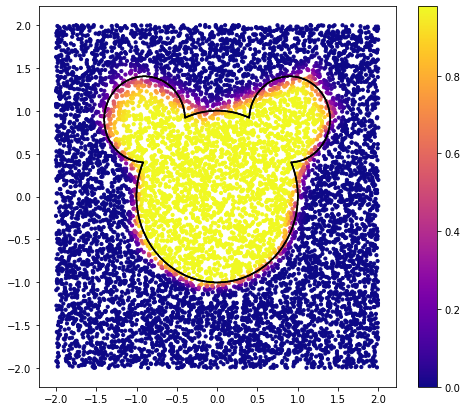

In [8]:
# evaluate the keras model
dataset_size=10000
# initialize testing dataset
X_test=np.zeros((dataset_size,2))
y_test=np.zeros(dataset_size)

# generate random data points without error (ground truth)
for i in range(dataset_size):
    X_test[i,0]=random.uniform(-board,board)
    X_test[i,1]=random.uniform(-board,board)
    y_test[i]=mickey(X_test[i,0],X_test[i,1],0,radius1,radius2)

# print accuracy
# _, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))
# plot testing result
fig, ax=plt.subplots(figsize=(8,7))        
plt.contour(BoundX, BoundY, BoundZ, 1, colors='k') 
sc=ax.scatter(X_test[:,0],X_test[:,1],c=((model.predict(X_test)).T)[0],s=10,cmap='plasma')
plt.colorbar(sc)

## Exercise 1

Experiment with different model configurations (number of layers, neurons per layer, activation functions, number of epochs, etc.) to see if you can beat the accuracy of 98.6%. Please use model.summary() function to print the best configuration you used. Include the summary information and the figure of testing dataset in the final report.

Plot a figure of accuracy change with parameters used. You can find how much parameters are used with model.summary() function. Please explore different size of neural network with parameters from 100 to 10,000. Please try at least 5 models. Include this figure in the final report.

## Exercise 2

Use the best configuration you find in the exercise 1 and change the number of your training data. Plot a figure of accuracy change with training dataset size. Please explore the different size of training data, from 1,000 to 100,000. Please try at least 5 different dataset size. Inlude this figure in the final report.


## Exercise 3

Experiment with a new function called 'Chair', try your best to outline the shape of chair using neural network. Try different model configurations and print the best configuration. Please repeat Exercise 1 and 2 with 'Chair' function.

The Definition of Chair function is provided, you can copy and paste it.

```
# ground truth function
def chair(x,y,error,width,height):
    r=0.7*width
    if random.choice([0,1])==0:
        width+=error
    else:
        height+=error
    if  x**2+9*y**2<width**2 or \
        (x>r and x<width and y<0 and y>-height) or \
        (x<-r and x>-width and y>-height and y<height):
        return 1 
    else:
        return 0
```
